In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno


In [3]:
#import data
labeled_data = pd.read_csv("TrainingWiDS2021.csv")
dic = pd.read_csv("DataDictionaryWiDS2021.csv")

APACHE is an illness severity score. Also the APACHE score has suboptimal calibration which makes it hard to compare across different hospitals. Therefore, the APACHE covariates features are probably not as interesting for detecting diabetes. We will focus on them if we have some time left at the end.

APACHE II diagnosis and APACHE IIIj diagnosis contain redundant information. APACHE IIIj diagnosis contains more fine-grained information than APACHE II diagnosis. (APACHE IIIj diagnosis will be dropped later.)

In [6]:
pd.set_option('display.max_colwidth', None)
Acovariate = dic.loc[dic['Category']=='APACHE covariate']
display(Acovariate)

Category          Variable Name         Unit of Measure Data Type  \
17  APACHE covariate         albumin_apache                     g/L   numeric   
18  APACHE covariate     apache_2_diagnosis                    None    string   
19  APACHE covariate    apache_3j_diagnosis                    None    string   
20  APACHE covariate  apache_post_operative                    None    binary   
21  APACHE covariate             arf_apache                    None    binary   
22  APACHE covariate       bilirubin_apache              micromol/L   numeric   
23  APACHE covariate             bun_apache                  mmol/L   numeric   
24  APACHE covariate      creatinine_apache              micromol/L   numeric   
25  APACHE covariate            fio2_apache                Fraction   numeric   
26  APACHE covariate        gcs_eyes_apache                    None   integer   
27  APACHE covariate       gcs_motor_apache                    None   integer   
28  APACHE covariate      gcs_unable_apache                    None    binary   
29  APACHE covariate      gcs_verbal_apache                    None   integer   
30  APACHE covariate         glucose_apache                  mmol/L   numeric   
31  APACHE covariate      heart_rate_apache        Beats per minute   numeric   
32  APACHE covariate      hematocrit_apache                Fraction   numeric   
33  APACHE covariate       intubated_apache                    None    binary   
34  APACHE covariate             map_apache  Millimetres of mercury   numeric   
35  APACHE covariate           paco2_apache  Millimetres of mercury   numeric   
36  APACHE covariate    paco2_for_ph_apache  Millimetres of mercury   numeric   
37  APACHE covariate            pao2_apache  Millimetres of mercury   numeric   
38  APACHE covariate              ph_apache                    None   numeric   
39  APACHE covariate        resprate_apache      Breaths per minute   numeric   
40  APACHE covariate          sodium_apache                  mmol/L   numeric   
41  APACHE covariate            temp_apache         Degrees Celsius   numeric   
42  APACHE covariate     urineoutput_apache             Millilitres   numeric   
43  APACHE covariate      ventilated_apache                    None    binary   
44  APACHE covariate             wbc_apache                  10^9/L   numeric   

                                                                                                                                                                                                                                                                       Description  \
17                                                                                                                                                                      The albumin concentration measured during the first 24 hours which results in the highest APACHE III score   
18                                                                                                                                                                                                                                   The APACHE II diagnosis for the ICU admission   
19                                                                                                                                                                                       The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission   
20                                                                                                                                                                                                          The APACHE operative status; 1 for post-operative, 0 for non-operative   
21                                                                                         Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialys

In [22]:
Acovariate_columns = Acovariate['Variable Name'].to_list()

In [29]:
Acovariate_data = labeled_data[Acovariate_columns]

Acovariate_data

albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
0                  2.3               113.0               502.01   
1                  NaN               108.0               203.01   
2                  NaN               122.0               703.03   
3                  NaN               203.0              1206.03   
4                  NaN               119.0               601.01   
...                ...                 ...                  ...   
130152             NaN               110.0               104.01   
130153             3.5               105.0               207.01   
130154             NaN               114.0               102.01   
130155             NaN               124.0               306.01   
130156             NaN               105.0               207.01   

        apache_post_operative  arf_apache  bilirubin_apache  bun_apache  \
0                           0           0               0.4        31.0   
1                           0           0               NaN         9.0   
2                           0           0               NaN         NaN   
3                           1           0               NaN         NaN   
4                           0           0               NaN         NaN   
...                       ...         ...               ...         ...   
130152                      0           0               NaN         NaN   
130153                      0           0               0.7        32.0   
130154                      0           0               NaN        30.0   
130155                      0           0               NaN         NaN   
130156                      0           0               NaN         NaN   

        creatinine_apache  fio2_apache  gcs_eyes_apache  ...  paco2_apache  \
0                    2.51          NaN              3.0  ...           NaN   
1                    0.56          1.0              1.0  ...          37.0   
2                     NaN          NaN              3.0  ...           NaN   
3                     NaN          0.6              4.0  ...          30.0   
4                     NaN          NaN              NaN  ...           NaN   
...                   ...          ...              ...  ...           ...   
130152                NaN          NaN              4.0  ...           NaN   
130153               1.07          NaN              4.0  ...           NaN   
130154               2.43          1.0              1.0  ...          44.0   
130155                NaN          NaN              4.0  ...           NaN   
130156                NaN          NaN              4.0  ...           NaN   

        paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  \
0                       NaN          NaN        NaN             36.0   
1                      37.0         51.0      7.450             33.0   
2                       NaN          NaN        NaN             37.0   
3                      30.0        142.0      7.390              4.0   
4                       NaN          NaN        NaN             16.0   
...                     ...          ...        ...              ...   
130152                  NaN          NaN        NaN             50.0   
130153                  NaN          NaN        NaN             42.0   
130154                 44.0         80.0      7.224             34.0   
130155                  NaN          NaN        NaN             31.0   
130156                  NaN          NaN        NaN             57.0   

        sodium_apache  temp_apache  urineoutput_apache  ventilated_apache  \
0               134.0         39.3                 NaN                  0   
1               145.0         35.1                 NaN                  1   
2                 NaN         36.7                 NaN                  0   
3                 NaN         34.8                 NaN                  1   
4                 NaN         36.7                 NaN                  0   
...               ...          ...    

In [27]:
Acovariate_data.describe()

albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    51994.000000       128472.000000        129292.000000   
mean         2.886149          185.492683           565.994296   
std          0.689812           85.858208           466.510850   
min          1.200000          101.000000             0.010000   
25%          2.400000          113.000000           204.010000   
50%          2.900000          122.000000           409.020000   
75%          3.400000          301.000000           703.030000   
max          4.600000          308.000000          2201.050000   

       apache_post_operative     arf_apache  bilirubin_apache     bun_apache  \
count          130157.000000  130157.000000      47597.000000  104746.000000   
mean                0.207111       0.027997          1.201222      25.718070   
std                 0.405238       0.164965          2.351994      20.690041   
min                 0.000000       0.000000          0.100000       4.000000   
25%                 0.000000       0.000000          0.400000      13.000000   
50%                 0.000000       0.000000          0.700000      19.000000   
75%                 0.000000       0.000000          1.100000      31.000000   
max                 1.000000       1.000000         60.200000     127.000000   

       creatinine_apache   fio2_apache  gcs_eyes_apache  ...  paco2_apache  \
count      105275.000000  30437.000000    127967.000000  ...  30437.000000   
mean            1.481629      0.595735         3.488290  ...     42.161246   
std             1.543535      0.262922         0.939831  ...     12.267414   
min             0.300000      0.210000         1.000000  ...     18.000000   
25%             0.710000      0.400000         3.000000  ...     34.500000   
50%             0.970000      0.500000         4.000000  ...     40.000000   
75%             1.530000      0.850000         4.000000  ...     47.000000   
max            11.180000      1.000000         4.000000  ...     95.000000   

       paco2_for_ph_apache   pao2_apache     ph_apache  resprate_apache  \
count         30437.000000  30437.000000  30437.000000    129349.000000   
mean             42.161246    132.061737      7.352154        25.150603   
std              12.267414     84.958826      0.098423        15.024730   
min              18.000000     31.000000      6.960540         4.000000   
25%              34.500000     77.000000      7.301000        11.000000   
50%              40.000000    104.000000      7.360000        27.000000   
75%              47.000000    156.000000      7.414000        36.000000   
max              95.000000    498.000000      7.590000        60.000000   

       sodium_apache    temp_apache  urineoutput_apache  ventilated_apache  \
count   105638.00000  123546.000000        66990.000000      130157.000000   
mean       137.94526      36.420638         1800.803417           0.330432   
std          5.30384       0.857584         1456.551481           0.470370   
min        117.00000      32.100000            0.000000           0.000000   
25%        135.00000      36.200000          799.048800           0.000000   
50%        138.00000      36.500000         1454.976000           0.000000   
75%        141.00000      36.700000         2415.096000           1.000000   
max        158.00000      39.700000         8716.669632           1.000000   

          wbc_apache  
count  100682.000000  
mean       12.187662  
std         6.931023  
min         0.900000  
25%         7.500000  
50%        10.470000  
75%        15.300000  
max        45.800000  

[8 rows x 28 columns]

In [23]:
#labeled_data.loc[labeled_data['Category'] == "APACHE covariate"]

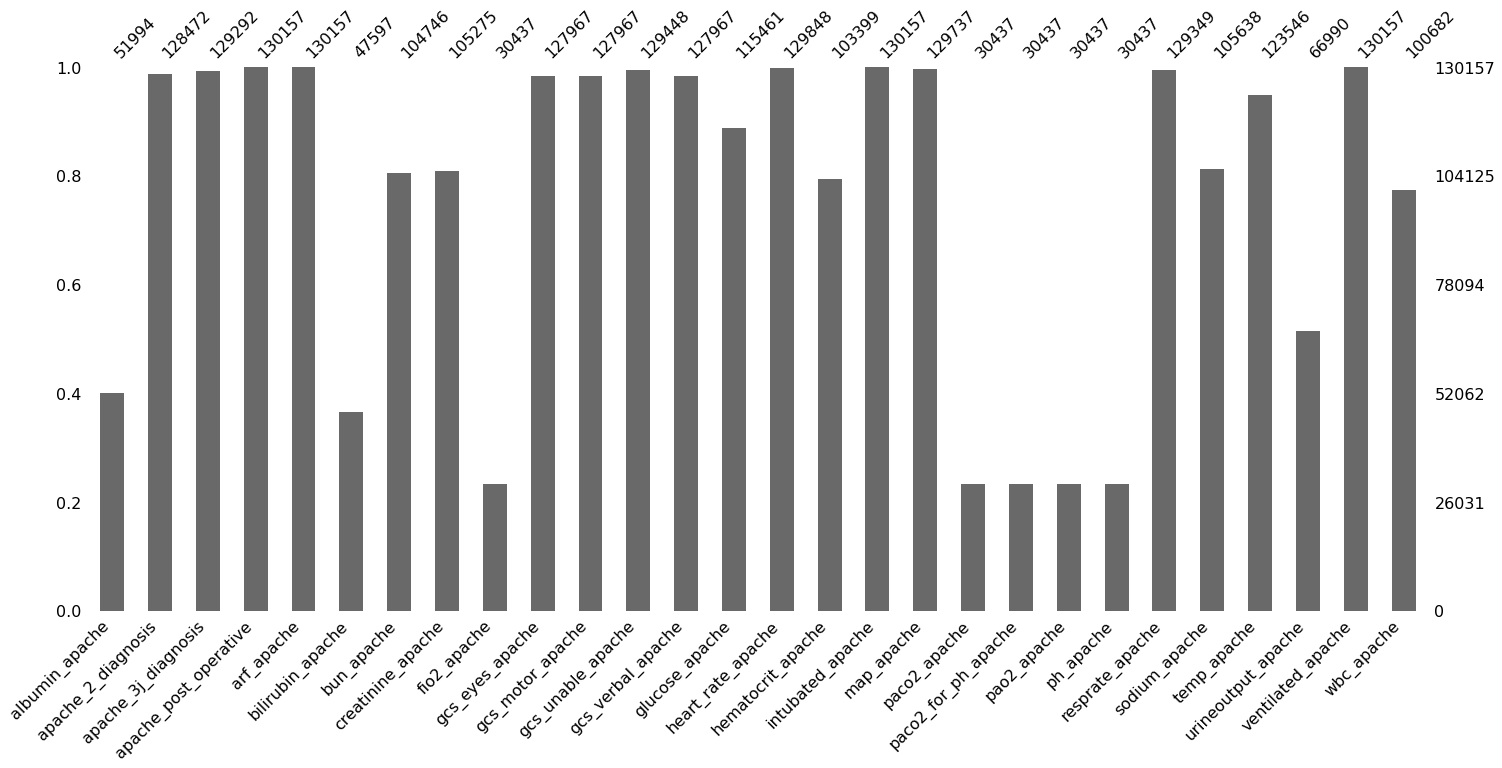

In [25]:
msno.bar(Acovariate_data)

In [28]:
#Missing values
train_df['apache_2_diagnosis'] = (train_df.apache_2_diagnosis).fillna(0).astype(int)
train_df['apache_3j_diagnosis'] = (train_df.apache_3j_diagnosis).fillna(0).astype(int)


In [ ]:
train_df['apache_2_diagnosis'] = (train_df.apache_2_diagnosis).fillna(0).astype(int)
#train_df['apache_2_diagnosis_type'] = train_df.apache_2_diagnosis.round(-1).fillna(0).astype(int)
train_df['apache_3j_diagnosis'] = (train_df.apache_3j_diagnosis).fillna(0).astype(int)
#train_df['apache_3j_diagnosis_type'] = train_df.apache_3j_diagnosis.round(-2).fillna(0).astype(int)

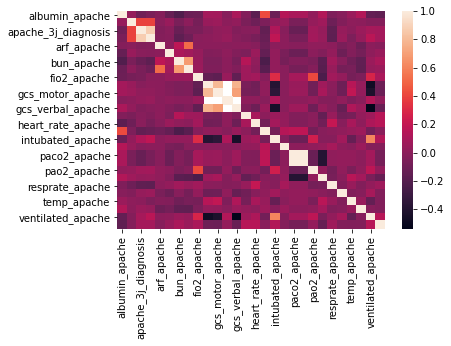

albumin_apache  apache_2_diagnosis  \
albumin_apache                    1.0                 NaN   
apache_2_diagnosis                NaN                 1.0   
apache_3j_diagnosis               NaN                 NaN   
apache_post_operative             NaN                 NaN   
arf_apache                        NaN                 NaN   
bilirubin_apache                  NaN                 NaN   
bun_apache                        NaN                 NaN   
creatinine_apache                 NaN                 NaN   
fio2_apache                       NaN                 NaN   
gcs_eyes_apache                   NaN                 NaN   
gcs_motor_apache                  NaN                 NaN   
gcs_unable_apache                 NaN                 NaN   
gcs_verbal_apache                 NaN                 NaN   
glucose_apache                    NaN                 NaN   
heart_rate_apache                 NaN                 NaN   
hematocrit_apache                 NaN                 NaN   
intubated_apache                  NaN                 NaN   
map_apache                        NaN                 NaN   
paco2_apache                      NaN                 NaN   
paco2_for_ph_apache               NaN                 NaN   
pao2_apache                       NaN                 NaN   
ph_apache                         NaN                 NaN   
resprate_apache                   NaN                 NaN   
sodium_apache                     NaN                 NaN   
temp_apache                       NaN                 NaN   
urineoutput_apache                NaN                 NaN   
ventilated_apache                 NaN                 NaN   
wbc_apache                        NaN                 NaN   

                       apache_3j_diagnosis  apache_post_operative  arf_apache  \
albumin_apache                         NaN                    NaN         NaN   
apache_2_diagnosis                     NaN                    NaN         NaN   
apache_3j_diagnosis               1.000000               0.879385         NaN   
apache_post_operative             0.879385               1.000000         NaN   
arf_apache                             NaN                    NaN    1.000000   
bilirubin_apache                       NaN                    NaN         NaN   
bun_apache                             NaN                    NaN         NaN   
creatinine_apache                      NaN                    NaN    0.521205   
fio2_apache                            NaN                    NaN         NaN   
gcs_eyes_apache                        NaN                    NaN         NaN   
gcs_motor_apache                       NaN                    NaN         NaN   
gcs_unable_apache                      NaN                    NaN         NaN   
gcs_verbal_apache                      NaN                    NaN         NaN   
glucose_apache                         NaN                    NaN         NaN   
heart_rate_apache                      NaN                    NaN         NaN   
hematocrit_apache                      NaN                    NaN         NaN   
intubated_apache                       NaN                    NaN         NaN   
map_apache                             NaN                    NaN         NaN   
paco2_apache                           NaN                    NaN         NaN   
paco2_for_ph_apache                    NaN                    NaN         NaN   
pao2_apache                            NaN                    NaN         NaN   
ph_apache                              NaN                    NaN         NaN   
resprate_apache                        NaN                    NaN         NaN   
sodium_apache                          NaN                    NaN         NaN   
temp_apache                            NaN                    NaN         NaN   
urineoutput_apache                     NaN                    NaN         NaN   
ventilated_apache                      NaN                    NaN 

In [30]:
sns.heatmap(Acovariate_data.corr())
plt.show()
#to check values:
a=Acovariate_data.corr()
b=a.where(a>0.5)
pd.set_option('display.max_columns', None)
display(b)
